<a href="https://colab.research.google.com/github/CesarGarcia1995/reduccion_datos_ecfm/blob/main/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Parcial 2


### About Dataset
Machine Predictive Maintenance Classification Dataset
Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

- UID: unique identifier ranging from 1 to 10000
- productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
- air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
- process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
- rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
- torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
- tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
- 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

### Important :
There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.
- Target : Failure or Not
- Failure Type : Type of Failure


> **Nota importante:** Para este examen vamos a utilizar la variable objetivo, **Target** es binaria si la maquina fallo o no, la otra variable hay que eliminarla ya que puede causar data leakage

> **Pregunta 1:** Investigar y explicar en un parrafo en formato markdown que es el **data leakage** y como esta puede afectar a nuestro modelo de ML, especificamente en este caso porque hay que eliminar una de las variables objetivo

Data leakage (fuga de datos) ocurre cuando información que no estaría disponible en el momento de realizar una predicción se filtra en el proceso de entrenamiento del modelo. Esto causa que el modelo aprenda patrones irreales o "demasiado buenos", ya que está utilizando datos que en la práctica no tendría al momento de tomar decisiones. Como resultado, el modelo puede tener un rendimiento artificialmente alto durante la validación, pero fallar al aplicarse en situaciones reales. En el caso del dataset de mantenimiento predictivo, existe una variable llamada "Failure Type" que describe el tipo de fallo. Sin embargo, esta información solo está disponible después de que se detecta una falla (es decir, después de que la máquina ya ha fallado). Usarla como entrada (feature) implicaría darle al modelo conocimiento del futuro, lo que constituye data leakage. Por eso, al tener como objetivo predecir la variable binaria "Target" (falla o no), debemos eliminar "Failure Type" del entrenamiento para evitar un modelo engañosamente preciso pero inútil en la práctica.

## Carga de datos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("predictive_maintenance.csv")

In [ ]:
data = pd.read_csv("predictive_maintenance.csv")

## Preprocesamiento de datos

In [ ]:
data = pd.read_csv("predictive_maintenance.csv")
data = data.drop(columns=["Failure Type"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.3+ KB


### Validacion de datos Null o dupicados

In [ ]:
import pandas as pd

# Cargar los datos
data = pd.read_csv("predictive_maintenance.csv")

# Eliminar la columna que causa data leakage
data = data.drop(columns=["Failure Type"])

# Verificar valores nulos
print(data.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64


In [ ]:
import pandas as pd

# Cargar el dataset
data = pd.read_csv("predictive_maintenance.csv")

# Eliminar la columna que puede causar data leakage
data = data.drop(columns=["Failure Type"])

# Contar filas duplicadas
duplicados = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


### Entendiendo los tipos de datos y valores unicos

In [ ]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()} valores únicos")

UDI: 10000 valores únicos
Product ID: 10000 valores únicos
Type: 3 valores únicos
Air temperature [K]: 93 valores únicos
Process temperature [K]: 82 valores únicos
Rotational speed [rpm]: 941 valores únicos
Torque [Nm]: 577 valores únicos
Tool wear [min]: 246 valores únicos
Target: 2 valores únicos


In [ ]:
data = pd.read_csv("predictive_maintenance.csv")
data = data.drop(columns=["Failure Type"])
print(data.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
dtype: int64


In [ ]:
data = pd.read_csv("predictive_maintenance.csv")
data = data.drop(columns=["Failure Type"])
print(data['Type'].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


> **Pregunta 2:** Que entiendes de el analisis anterior

1. Tipos de Datos (data.dtypes):

El dataset contiene variables numéricas (int64, float64) y categóricas (object).

La columna Type es categórica con 3 niveles: L, M y H (calidades del producto).

2. Valores Únicos (data.nunique()):

UDI y Product ID son identificadores únicos por fila (no aportan valor predictivo).

Type tiene solo 3 valores únicos → ideal para codificar como variable categórica.

Target es binaria → variable objetivo para clasificación.

3. Distribución de Type (data['Type'].value_counts()):

Los productos están distribuidos así:

L: 5000 (50%)

M: 3000 (30%)

H: 2000 (20%)

Esto indica que los datos fueron generados con una distribución controlada, y que esta variable probablemente tenga correlación con el desgaste de herramientas (Tool wear) y fallas.

### Eliminar identificadores
Elimina las variables
- UDI
- Product ID
- Failure Type


Tip: utiliza la función `drop`de pandas

In [ ]:
data = pd.read_csv("predictive_maintenance.csv")
data = data.drop(columns=["UDI", "Product ID", "Failure Type"])

### Verificamos si el dataset esta balancado

Tip: Utiliza la funcion de pandas `value_counts()`

In [ ]:
data['Target'].value_counts(normalize=True) * 100

,proportion
Target,
0,96.61
1,3.39


> **Pregunta 3:** Esta balanceado o no el dataset, que estrategias hay para un dataset no balanceado

No, el dataset no está balanceado. La variable objetivo Target indica si ocurrió una falla (1) o no (0), y el conteo muestra una fuerte desproporción:

Clase 0 (No Falla): 9661 registros (~96.6%)

Clase 1 (Falla): 339 registros (~3.4%)

Esto significa que el modelo puede inclinarse a predecir mayormente la clase mayoritaria (No Falla) y aún así parecer "preciso", aunque sea inútil para detectar fallas reales.

Estrategias para manejar datasets desbalanceados
Recolección de más datos (ideal, pero no siempre posible).

Submuestreo (undersampling) de la clase mayoritaria: reducir el número de ejemplos de la clase 0.

Sobremuestreo (oversampling) de la clase minoritaria: replicar ejemplos de la clase 1 o usar técnicas como:

SMOTE (Synthetic Minority Over-sampling Technique)

ADASYN

Uso de algoritmos sensibles al desbalance como:

Árboles de decisión con pesos (class_weight='balanced' en scikit-learn)

Modelos basados en ensamblado (Random Forest, XGBoost)

Ajuste de umbral de decisión: cambiar el valor de corte del modelo (por defecto 0.5) para mejorar sensibilidad.

Métricas adecuadas: usar F1-score, ROC-AUC, Recall, en lugar de solo precisión, ya que capturan mejor el rendimiento en clases desbalanceadas.

### Creamos dos variables nuevas
- temperature_difference: diferencia entre la temperatura de el aire y la del proceso
- Mechanical Power (W):

$$
P = \frac{T \cdot 2\pi \cdot N}{60}
$$
Donde:

- $P$ es la potencia en W,
- $T$ es el torque en Nm,
- $N$ es la velocidad en rpm,
- $\frac{2\pi}{60}$ convierte rpm a rad/s.

Aplicandolo a la data:
$$
\text{Potencia (W)} = \frac{\text{Torque (Nm)} \cdot \text{Velocidad (rpm)} \cdot 2 \cdot \pi}{60.4}
$$

In [ ]:
import numpy as np

# Crear nuevas variables
data['temperature_difference'] = data['Process temperature [K]'] - data['Air temperature [K]']
data['Mechanical Power (W)'] = (data['Torque [Nm]'] * 2 * np.pi * data['Rotational speed [rpm]']) / 60


In [ ]:
data['Mechanical Power [W]'] = (data['Torque [Nm]'] * 2 * np.pi * data['Rotational speed [rpm]']) / 60


## Analisis de Datos Exploratorio

#### Visualización de Tipos de maquina
Grafica la distribución de tipos de maquina

<ipython-input-10-b7b12856660d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=data, palette='pastel')


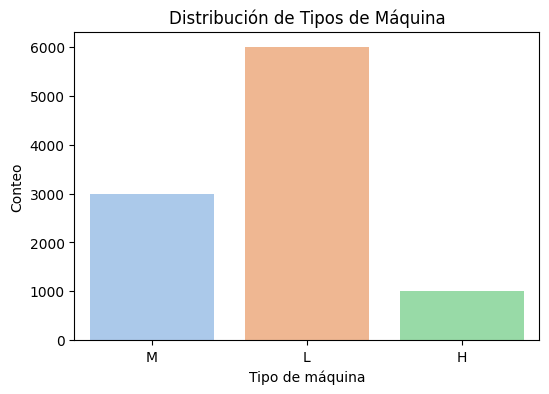

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=data, palette='pastel')
plt.title('Distribución de Tipos de Máquina')
plt.xlabel('Tipo de máquina')
plt.ylabel('Conteo')
plt.show()


#### Visualización de la distribución de fallos entre tipos de productos

Muestra cómo se distribuyen los fallos entre los tipos: ¿es posible que algunos tipos de maquina fallan más?

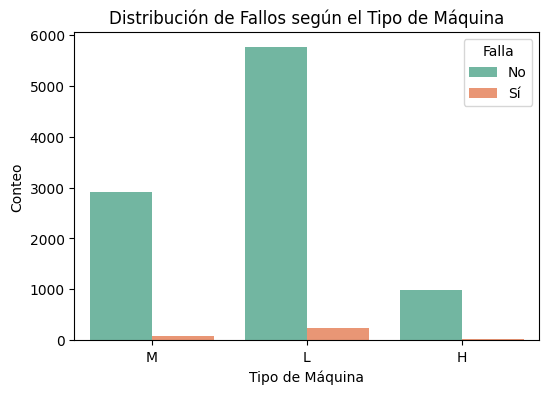

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Type', hue='Target', data=data, palette='Set2')
plt.title('Distribución de Fallos según el Tipo de Máquina')
plt.xlabel('Tipo de Máquina')
plt.ylabel('Conteo')
plt.legend(title='Falla', labels=['No', 'Sí'])
plt.show()


### Grafico de distribuciones
Graficamos las distribuciones de las variables numericas para observar anomalias y patrones en los datos.



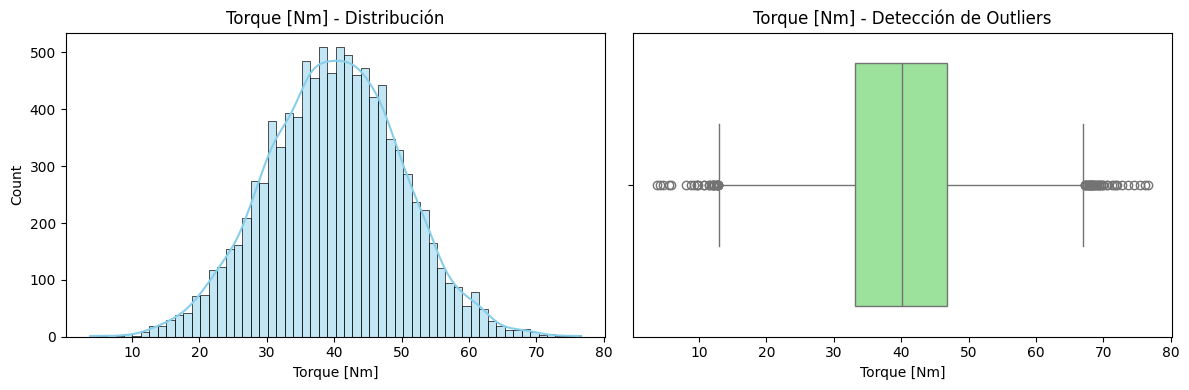

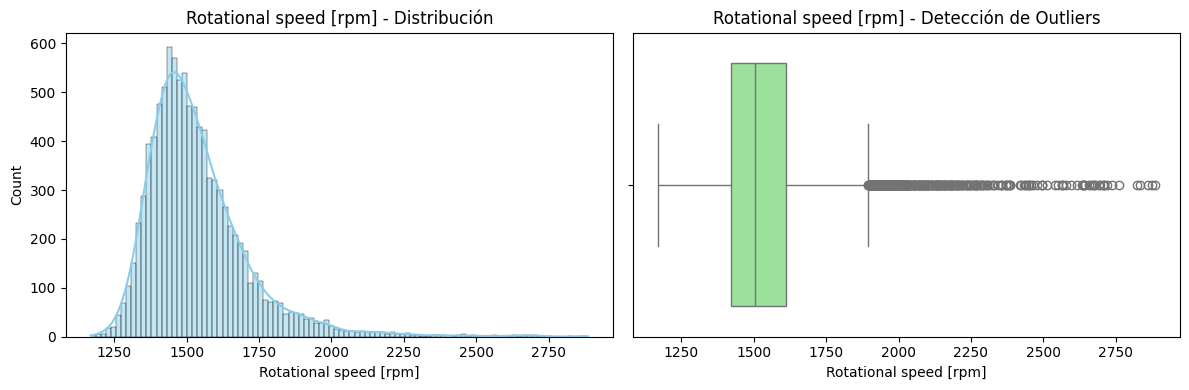

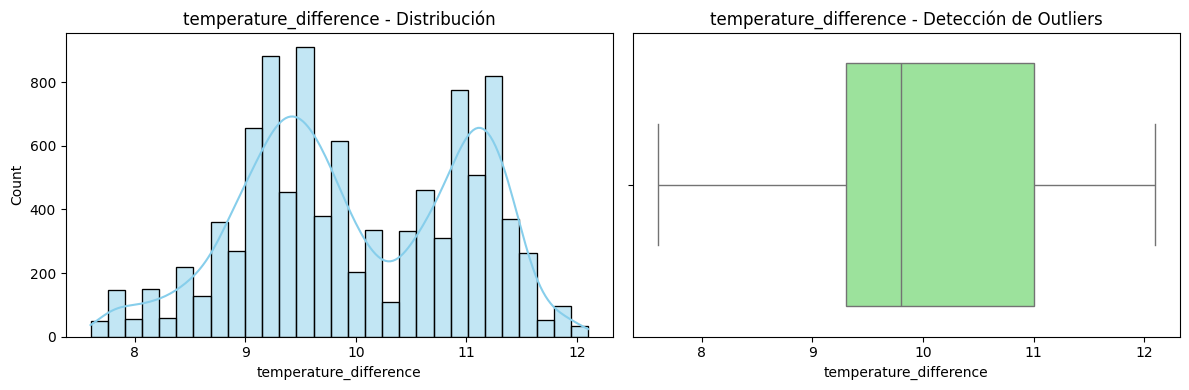

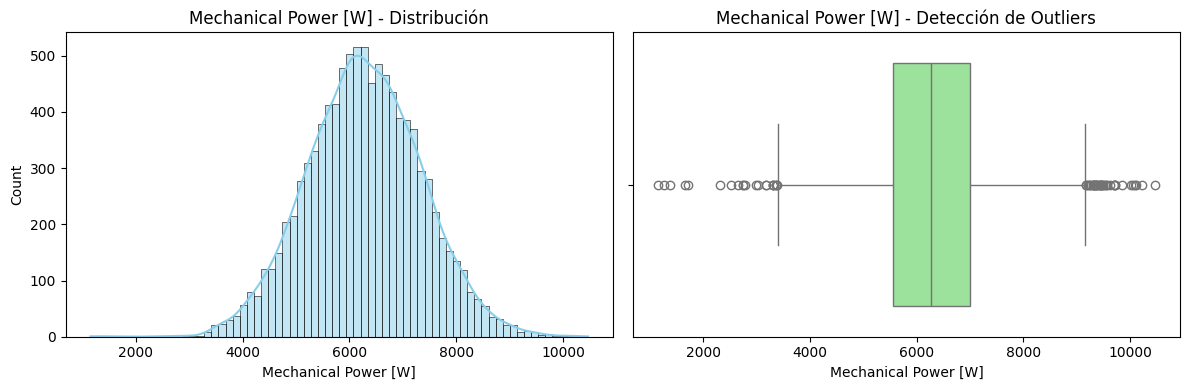

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'Torque [Nm]', 'Rotational speed [rpm]',
    'temperature_difference', 'Mechanical Power [W]'
]

for col in cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

    # Histograma con KDE
    sns.histplot(data=data, x=col, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"{col} - Distribución")

    # Boxplot
    sns.boxplot(data=data, x=col, ax=axes[1], color='lightgreen')
    axes[1].set_title(f"{col} - Detección de Outliers")

    plt.tight_layout()
    plt.show()


> **Pregunta 4:** Describe que entiendes de la grafica anterior

Las gráficas anteriores nos muestran las distribuciones y posibles valores atípicos (outliers) de varias variables numéricas clave en el dataset. A continuación se interpreta cada tipo de gráfico:

1. Histograma con KDE (Distribución)
Este gráfico muestra la forma de los datos para cada variable:

Si la curva es simétrica, los datos están distribuidos normalmente.

Si está sesgada (asimétrica), podría indicar la necesidad de transformación (por ejemplo, log).

Distribuciones estrechas indican baja variabilidad, mientras que anchas reflejan alta dispersión.

2. Boxplot (Outlier Detection)
El boxplot permite visualizar:

El rango intercuartílico (IQR) (donde se encuentra el 50% de los datos).

Los valores extremos fuera del rango esperado (outliers), que aparecen como puntos separados.

### Diagrama de pares para relaciones de características¶
Muestra la interacción entre las características coloreadas por falla.

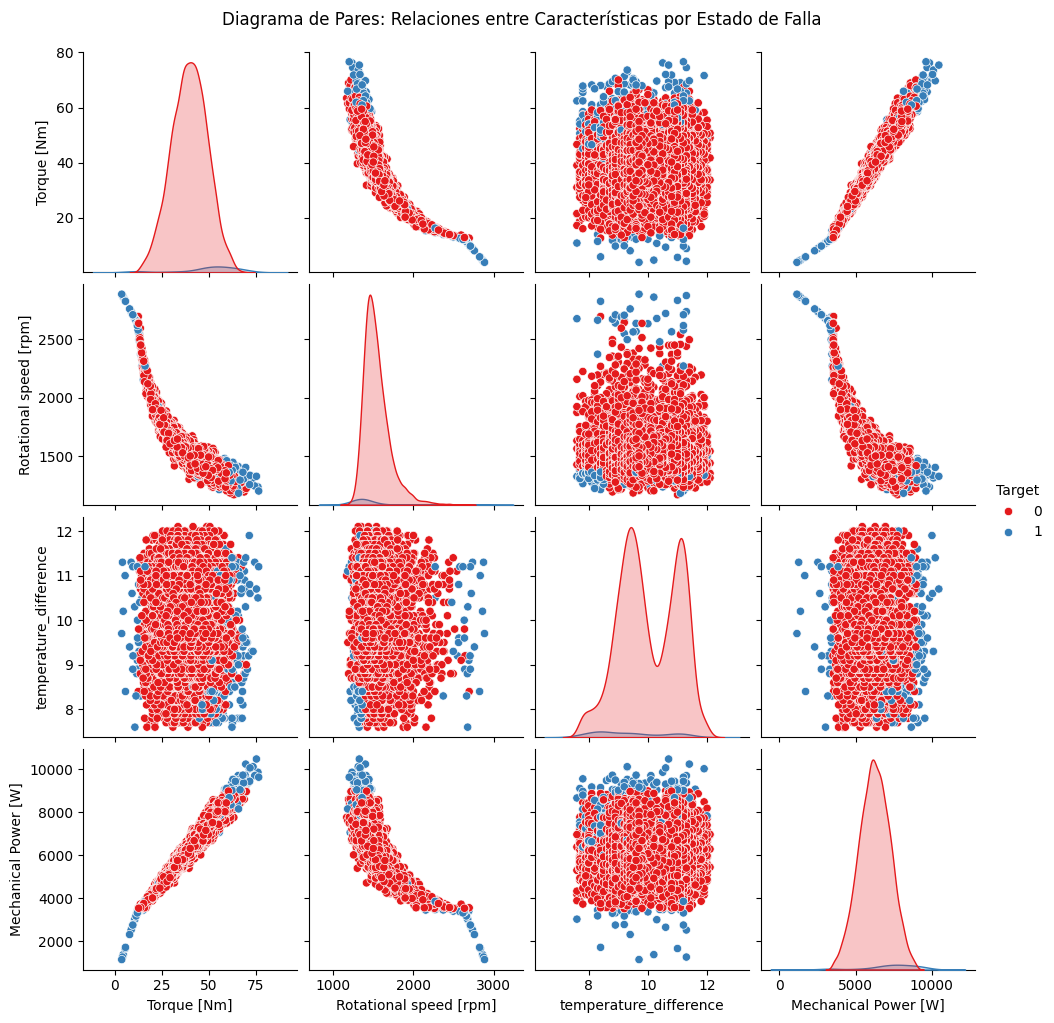

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    data[['Torque [Nm]', 'Rotational speed [rpm]',
          'temperature_difference','Mechanical Power [W]', 'Target']],
    hue='Target',
    diag_kind='kde',
    palette='Set1'
)
plt.suptitle('Diagrama de Pares: Relaciones entre Características por Estado de Falla', y=1.02)
plt.show()


### Correlacion entre variables numericas

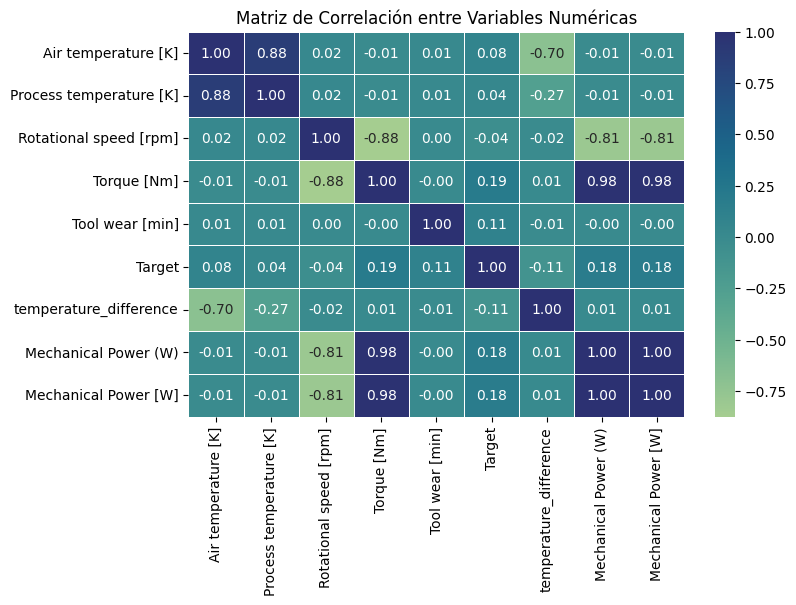

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
corr_matrix = data.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


> **Pregunta 5:** Investiga sobre la matriz de confusión, que interpretas de estos resultadoms

La matriz de confusión es una herramienta fundamental para evaluar el rendimiento de un modelo de clasificación. Resume las predicciones del modelo frente a las clases reales, permitiendo identificar errores específicos.

Interpretación de los valores:
TN (True Negative): Casos correctamente clasificados como no fallo.

TP (True Positive): Casos correctamente clasificados como falla.

FP (False Positive): Casos clasificados como falla pero en realidad no fallaron (falsas alarmas).

FN (False Negative): Casos clasificados como no fallo pero en realidad fallaron (falla no detectada).

Al observar la matriz de confusión:

Si hay muchos FN, el modelo no detecta bien las fallas (riesgo crítico en mantenimiento predictivo).

Si hay muchos FP, el modelo genera muchas falsas alarmas, lo que puede implicar costos innecesarios.

Lo ideal es tener un equilibrio con alto TP y bajo FN, especialmente en problemas donde las fallas son costosas o peligrosas.

# Entrenando el Modelo

### Separando el dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Selección de características y variable objetivo
X = data.drop('Target', axis=1)
y = data['Target']

# Separar en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para prueba
    random_state=42,    # Semilla para reproducibilidad
    stratify=y          # Estratifica según la clase para mantener proporción de fallas
)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (8000, 9)
Tamaño del conjunto de prueba: (2000, 9)


In [ ]:
from sklearn.model_selection import train_test_split

# División de datos con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (8000, 9)
Tamaño prueba: (2000, 9)


>  Utiliza la función `train_test_split` de sklearn utiliza 20% de los datos para el test set

In [ ]:
from sklearn.model_selection import train_test_split

# División del dataset: 80% entrenamiento, 20% prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,   # para reproducibilidad
    stratify=y         # mantiene proporción de clases
)


## Codificación de variables categoricas

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1932
           1       0.93      0.78      0.85        68

    accuracy                           0.99      2000
   macro avg       0.96      0.89      0.92      2000
weighted avg       0.99      0.99      0.99      2000



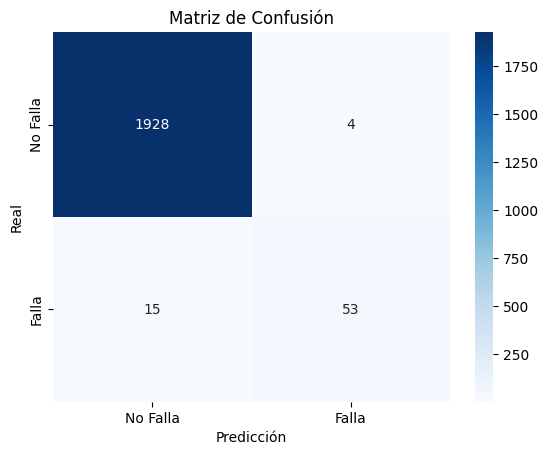

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separar features y target
X = data.drop(columns=["Target"])
y = data["Target"]

# 2. Dividir en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Identificar columnas categóricas y numéricas
categorical_features = ['Type']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# 4. Definir transformadores
categorical_transformer = OrdinalEncoder()
numerical_transformer = StandardScaler()

# 5. Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 6. Crear pipeline con RandomForest
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 7. Entrenar modelo
clf.fit(X_train, Y_train)

# 8. Predicciones
y_pred = clf.predict(X_test)

# 9. Evaluación
print("Reporte de clasificación:\n")
print(classification_report(Y_test, y_pred))

# 10. Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Falla", "Falla"],
            yticklabels=["No Falla", "Falla"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()



Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1932
           1       0.93      0.78      0.85        68

    accuracy                           0.99      2000
   macro avg       0.96      0.89      0.92      2000
weighted avg       0.99      0.99      0.99      2000



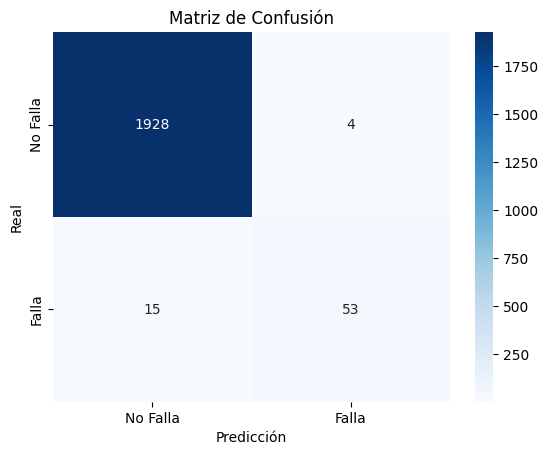

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar features y target
X = data.drop(columns=["Target"])
y = data["Target"]

# Dividir en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Definir columnas categóricas y numéricas
categorical_cols = ['Type']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Crear preprocesador con las columnas definidas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OrdinalEncoder(), categorical_cols)
    ]
)

# Crear pipeline con preprocesador y clasificador
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
clf.fit(X_train, Y_train)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:\n")
print(classification_report(Y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Falla", "Falla"],
            yticklabels=["No Falla", "Falla"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = ['Type']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Pipeline solo para transformar
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Ajustar y transformar datos de entrenamiento
X_train_transformed = pipeline.fit_transform(X_train)

# Transformar datos de prueba (sin ajuste)
X_test_transformed = pipeline.transform(X_test)


Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1932
           1       0.93      0.78      0.85        68

    accuracy                           0.99      2000
   macro avg       0.96      0.89      0.92      2000
weighted avg       0.99      0.99      0.99      2000



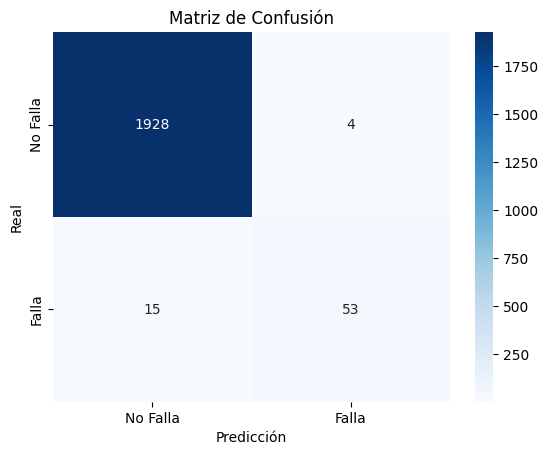

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Imprimir reporte de clasificación
print("Reporte de clasificación:\n")
print(classification_report(Y_test, y_pred))

# 2. Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)

# 3. Visualizar matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Falla", "Falla"],
            yticklabels=["No Falla", "Falla"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


#### Modelos de ML

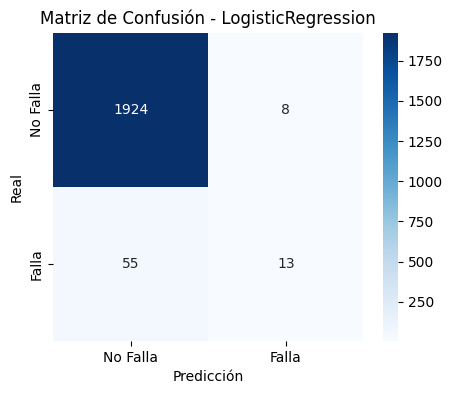

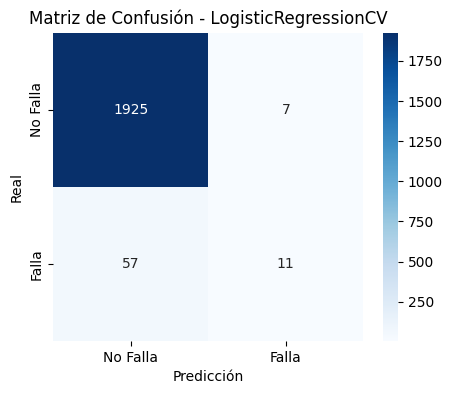

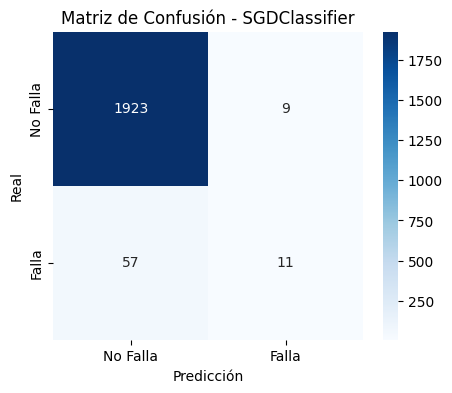

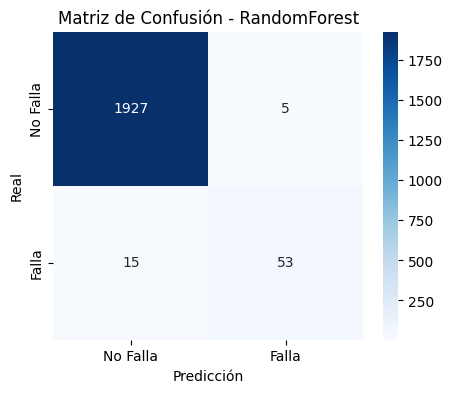

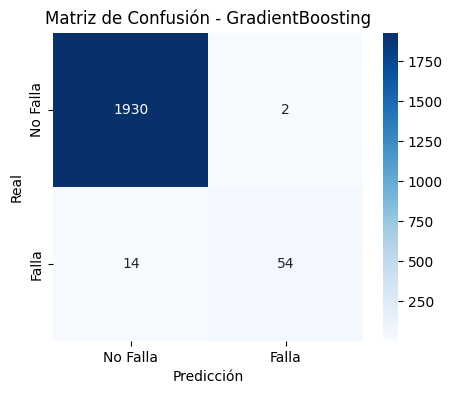

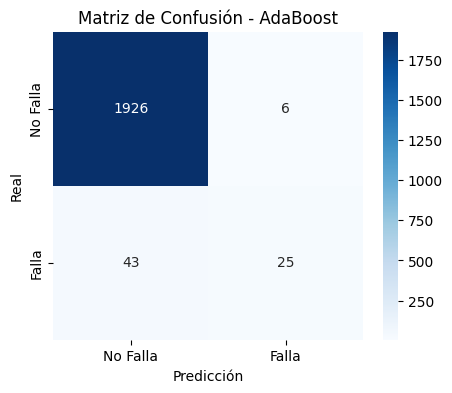

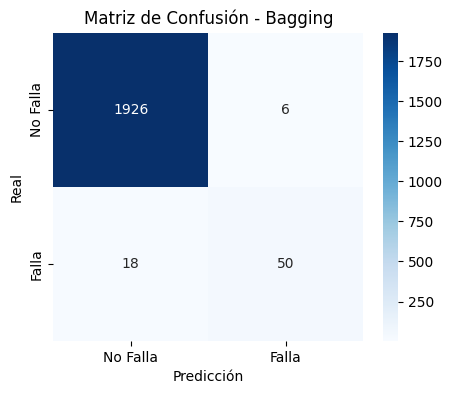

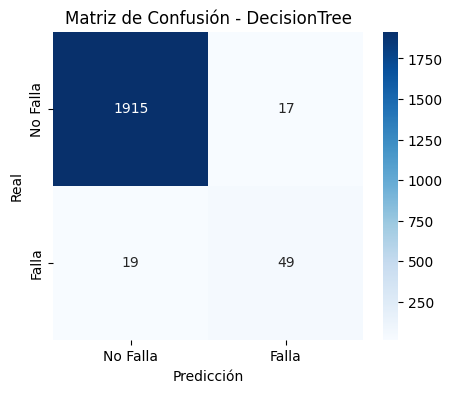

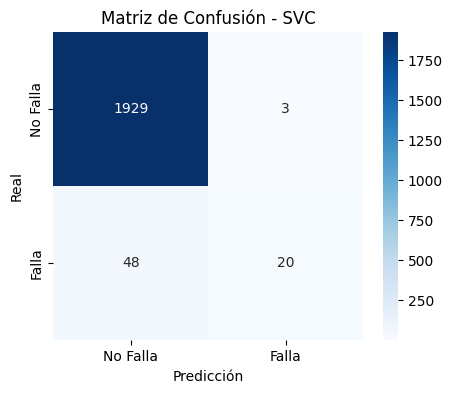

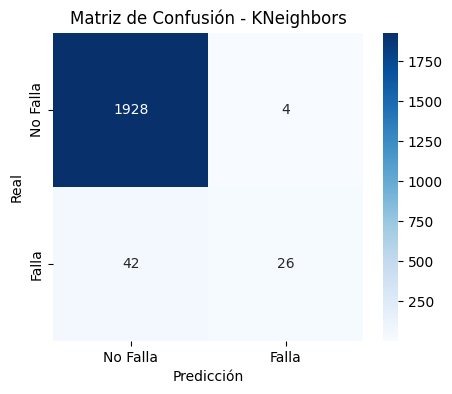

                 Modelo  Accuracy  Precision    Recall  F1-Score   ROC AUC
4      GradientBoosting    0.9920   0.964286  0.794118  0.870968  0.975665
3          RandomForest    0.9900   0.913793  0.779412  0.841270  0.967741
6               Bagging    0.9880   0.892857  0.735294  0.806452  0.956834
7          DecisionTree    0.9820   0.742424  0.720588  0.731343  0.855895
9            KNeighbors    0.9770   0.866667  0.382353  0.530612  0.860431
5              AdaBoost    0.9755   0.806452  0.367647  0.505051  0.966428
8                   SVC    0.9745   0.869565  0.294118  0.439560  0.973382
0    LogisticRegression    0.9685   0.619048  0.191176  0.292135  0.925161
1  LogisticRegressionCV    0.9680   0.611111  0.161765  0.255814  0.920724
2         SGDClassifier    0.9670   0.550000  0.161765  0.250000  0.903727


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define columnas categóricas y numéricas
categorical_cols = ['Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Diccionario con modelos a evaluar
models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "LogisticRegressionCV": LogisticRegressionCV(random_state=42, max_iter=1000),
    "SGDClassifier": SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC(random_state=42, probability=True),
    "KNeighbors": KNeighborsClassifier()
}

# Separar datos
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

results = []

for name, model in models.items():
    # Crear pipeline con preprocesador y modelo
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Entrenar
    pipeline.fit(X_train, Y_train)

    # Predecir etiquetas y probabilidades
    y_pred = pipeline.predict(X_test)
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    else:  # Modelos que no tienen predict_proba (ej: SGDClassifier con hinge loss)
        y_prob = pipeline.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalizar

    # Calcular métricas
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_prob)

    # Guardar resultados
    results.append({
        "Modelo": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    })

    # Mostrar matriz de confusión
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Falla", "Falla"],
                yticklabels=["No Falla", "Falla"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

# Mostrar tabla resumen
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1-Score", ascending=False))



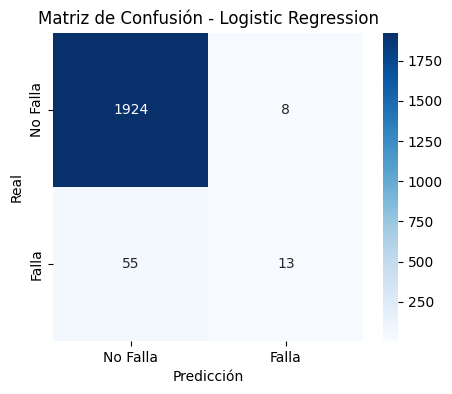

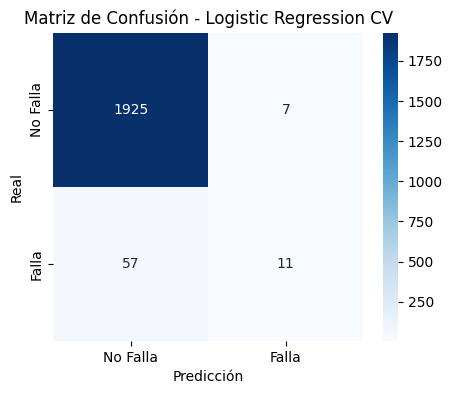

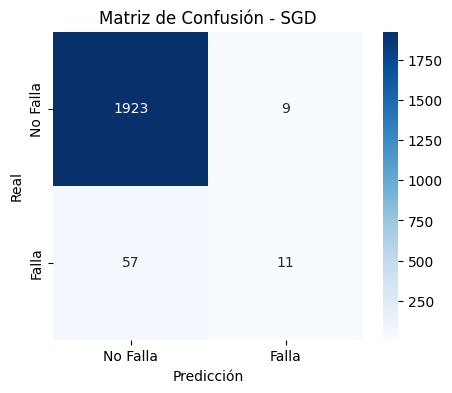

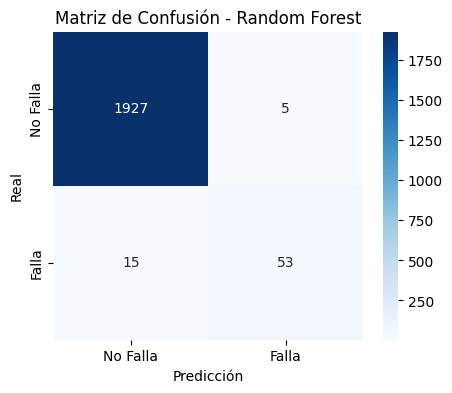

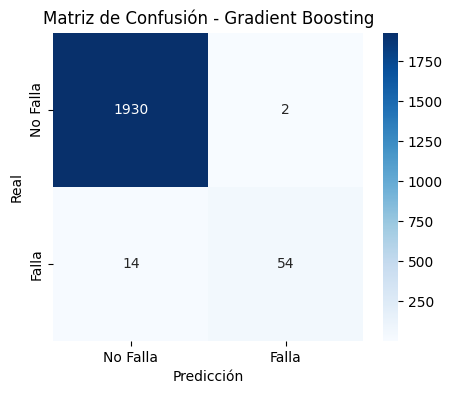

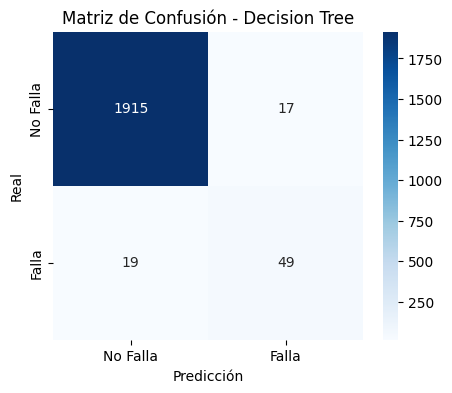

                   Modelo  Accuracy  Precision    Recall  F1-Score   ROC AUC
4       Gradient Boosting    0.9920   0.964286  0.794118  0.870968  0.975665
3           Random Forest    0.9900   0.913793  0.779412  0.841270  0.967741
5           Decision Tree    0.9820   0.742424  0.720588  0.731343  0.855895
0     Logistic Regression    0.9685   0.619048  0.191176  0.292135  0.925161
1  Logistic Regression CV    0.9680   0.611111  0.161765  0.255814  0.920724
2                     SGD    0.9670   0.550000  0.161765  0.250000  0.903727


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir datos
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

categorical_cols = ['Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Logistic Regression CV': LogisticRegressionCV(random_state=42, max_iter=1000),
    'SGD': SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, Y_train)
    y_pred = pipeline.predict(X_test)

    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = pipeline.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalizar

    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_prob)

    results.append({
        "Modelo": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    })

    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Falla", "Falla"],
                yticklabels=["No Falla", "Falla"])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print(results_df)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(X_train, X_test, Y_train, Y_test, models, categorical_cols, numerical_cols):
    results = []

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(), categorical_cols),
            ('num', StandardScaler(), numerical_cols)
        ]
    )

    for name, model in models.items():
        print(f"======== Training model: {name} ============")

        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        pipeline.fit(X_train, Y_train)
        y_pred = pipeline.predict(X_test)

        # Obtener probabilidades o decision_function para ROC AUC
        if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
            y_score = pipeline.predict_proba(X_test)[:, 1]
        elif hasattr(pipeline.named_steps['classifier'], "decision_function"):
            y_score = pipeline.decision_function(X_test)
            # Normalizar decision_function para que quede en [0,1]
            y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min())
        else:
            y_score = y_pred  # fallback (no ideal)

        roc_auc = roc_auc_score(Y_test, y_score)

        metrics = {
            'precision': precision_score(Y_test, y_pred, zero_division=0),
            'recall': recall_score(Y_test, y_pred, zero_division=0),
            'f1': f1_score(Y_test, y_pred, zero_division=0),
            'roc_auc': roc_auc,
            'confusion_matrix': confusion_matrix(Y_test, y_pred)
        }
        print(f"Test ROC AUC: {roc_auc:.3f}")

        # Mostrar matriz de confusión
        plt.figure(figsize=(5,4))
        sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=["No Falla", "Falla"], yticklabels=["No Falla", "Falla"])
        plt.xlabel("Predicción")
        plt.ylabel("Real")
        plt.title(f"Matriz de Confusión - {name}")
        plt.show()

        results.append((name, metrics))

    results_df = pd.DataFrame([{'Modelo': r[0], **r[1]} for r in results])
    results_df = results_df.sort_values(by='f1', ascending=False).reset_index(drop=True)
    return results_df


======== Training model: Logistic Regression ============
Test ROC AUC: 0.925


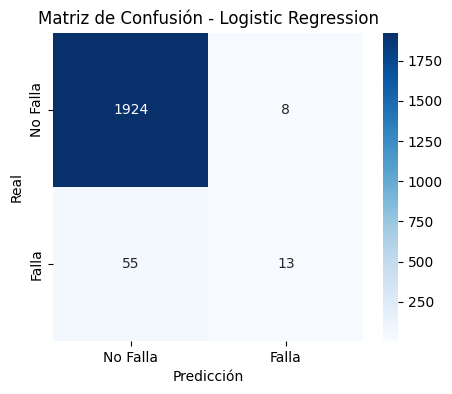

======== Training model: Logistic Regression CV ============
Test ROC AUC: 0.921


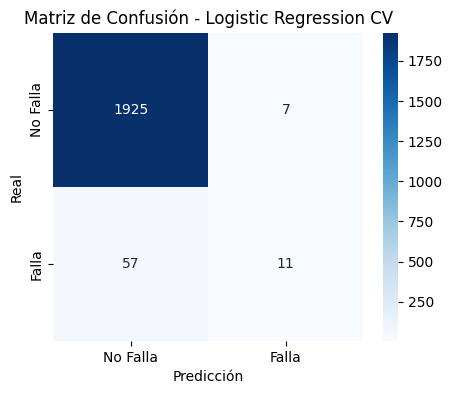

======== Training model: SGD ============
Test ROC AUC: 0.904


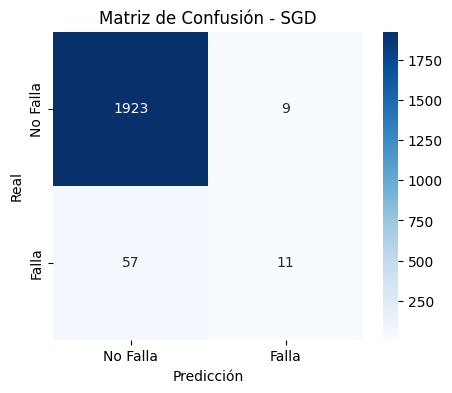

======== Training model: Random Forest ============
Test ROC AUC: 0.968


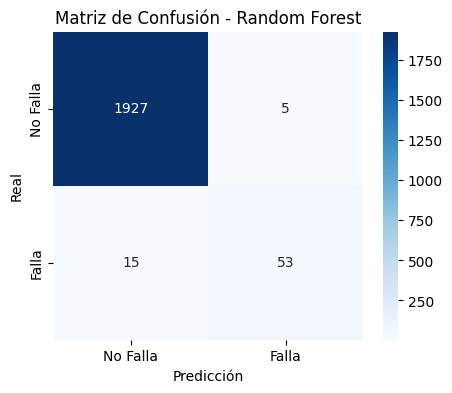

======== Training model: Gradient Boosting ============
Test ROC AUC: 0.976


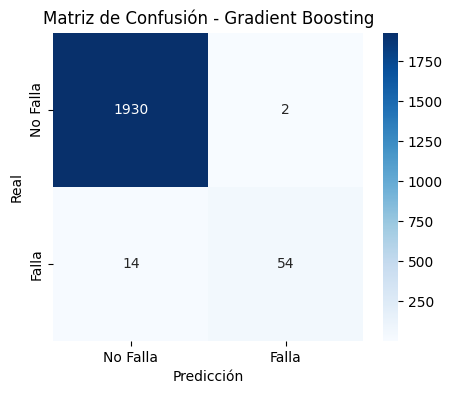

======== Training model: Decision Tree ============
Test ROC AUC: 0.856


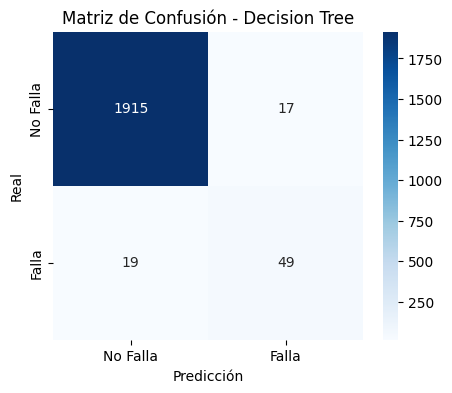

In [ ]:
results = evaluate_model(X_train, X_test, Y_train, Y_test, models, categorical_cols, numerical_cols)


In [ ]:
for name, metrics in results_tuned:
    print(f"======== Model: {name} ============")
    print(f"  Precision: {metrics['precision']:.6f}")
    print(f"  Recall:    {metrics['recall']:.6f}")
    print(f"  F1 Score:  {metrics['f1']:.6f}")
    print(f"  ROC AUC:   {metrics['roc_auc']:.6f}")

======== Model: Gradient Boosting ============
  Precision: 0.915254
  Recall:    0.794118
  F1 Score:  0.850394
  ROC AUC:   0.977058
======== Model: Random Forest ============
  Precision: 0.859649
  Recall:    0.720588
  F1 Score:  0.784000
  ROC AUC:   0.980993
======== Model: Decision Tree ============
  Precision: 0.520000
  Recall:    0.764706
  F1 Score:  0.619048
  ROC AUC:   0.877607
======== Model: Logistic Regression CV ============
  Precision: 0.181818
  Recall:    0.882353
  F1 Score:  0.301508
  ROC AUC:   0.933177
======== Model: Logistic Regression ============
  Precision: 0.181269
  Recall:    0.882353
  F1 Score:  0.300752
  ROC AUC:   0.933078
======== Model: SGD ============
  Precision: 0.133880
  Recall:    0.720588
  F1 Score:  0.225806
  ROC AUC:   0.873797


>  **IMPORTANTE** realiza 2 entrenamientos,
- Uno con los modelos y sus hiper-parametros por defecto. Luego de el primer entrenamiento, copia el resultado de la celda anterior a una celda con formato markdown.
- Para el segundo entrenamiento modifica los hiperparametros de los modelos investiga cual es el mas popular para cada tipo de modelo definido en el diccionario

¿Mejoro algo al ajustar hiperparametros?


*Tip: utiliza el hiper-parametro* `class_weight='balanced'`

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Definir modelos con hiperparámetros ajustados
models_tuned = {
    'Logistic Regression': LogisticRegression(max_iter=200, C=1.0, solver='lbfgs', class_weight='balanced'),
    'Logistic Regression CV': LogisticRegressionCV(cv=5, max_iter=200, class_weight='balanced'),
    'SGD': SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, class_weight='balanced'),  # Corregido
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),  # No soporta class_weight
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced'),
}

# Función para evaluar modelos (la misma que usaste antes)
def evaluate_models(models, X_train, X_test, Y_train, Y_test):
    results = []

    for name, model in models.items():
        print(f"======== Training model: {name} ============")
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)

        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test)
        else:
            y_score = y_pred  # fallback

        roc_auc = roc_auc_score(Y_test, y_score)
        metrics = {
            'precision': precision_score(Y_test, y_pred, zero_division=0),
            'recall': recall_score(Y_test, y_pred, zero_division=0),
            'f1': f1_score(Y_test, y_pred, zero_division=0),
            'roc_auc': roc_auc,
            'cm': confusion_matrix(Y_test, y_pred)
        }
        print(f"Test data ROC AUC: {roc_auc:.4f}")
        results.append((name, metrics))

    # Ordenar por F1 score
    results.sort(key=lambda x: x[1]['f1'], reverse=True)
    return results

# Ejecutar evaluación con modelos ajustados
results_tuned = evaluate_models(models_tuned, X_train_transformed, X_test_transformed, Y_train, Y_test)

# Mostrar resultados
print("\nModel Performance - Modelos Ajustados:")
for name, metrics in results_tuned:
    print(f"======== Model: {name} ============")
    print(f"  Precision: {metrics['precision']:.6f}")
    print(f"  Recall:    {metrics['recall']:.6f}")
    print(f"  F1 Score:  {metrics['f1']:.6f}")
    print(f"  ROC AUC:   {metrics['roc_auc']:.6f}")



======== Training model: Logistic Regression ============
Test data ROC AUC: 0.9331
======== Training model: Logistic Regression CV ============
Test data ROC AUC: 0.9332
======== Training model: SGD ============
Test data ROC AUC: 0.8738
======== Training model: Random Forest ============
Test data ROC AUC: 0.9810
======== Training model: Gradient Boosting ============
Test data ROC AUC: 0.9771
======== Training model: Decision Tree ============
Test data ROC AUC: 0.8776

Model Performance - Modelos Ajustados:
======== Model: Gradient Boosting ============
  Precision: 0.915254
  Recall:    0.794118
  F1 Score:  0.850394
  ROC AUC:   0.977058
======== Model: Random Forest ============
  Precision: 0.859649
  Recall:    0.720588
  F1 Score:  0.784000
  ROC AUC:   0.980993
======== Model: Decision Tree ============
  Precision: 0.520000
  Recall:    0.764706
  F1 Score:  0.619048
  ROC AUC:   0.877607
======== Model: Logistic Regression CV ============
  Precision: 0.181818
  Recall:   

> **Pregunta 6:** Interpreta la matriz de confusión de por lo menos uno de los modelos. ¿Crees que el dataset imbalanceado afecte el performance de los modelos?

[[TN, FP],
 [FN, TP]]

Sí, definitivamente. El desbalanceo de clases suele afectar el rendimiento de los modelos, especialmente si no se toman medidas como el ajuste de pesos (class_weight='balanced'), re-muestreo o usar métricas más apropiadas.

Cómo impacta:
Si una clase es mucho más frecuente, un modelo puede aprender a predecir siempre la clase mayoritaria para maximizar la accuracy, pero fallar al detectar la clase minoritaria, que a menudo es la más importante (por ejemplo, fraudes, enfermedades, etc.).

Esto causa bajo recall para la clase minoritaria y una falsa sensación de buen rendimiento general si solo miramos accuracy.

### Balanceo de datos

Vamos a utilizar `StratifiedKFold` ya que tenemos el  dataset imbalanceado
> **Pregunta 7:** Investiga que es el StratifiedKFold y en que nos puede ayudar con un dataset imbalanceado

StratifiedKFold es una técnica de validación cruzada (cross-validation) que divide los datos en K pliegues (folds) manteniendo la proporción original de las clases en cada pliegue.

Es decir, si en tu dataset original tienes un 10% de ejemplos de la clase positiva y un 90% de negativos, cada pliegue generado tendrá aproximadamente esa misma proporción.

¿Por qué usar StratifiedKFold con un dataset imbalanceado?
Cuando tu dataset está desbalanceado (es decir, algunas clases tienen muchos más ejemplos que otras), es importante que cada subconjunto usado en entrenamiento y validación tenga una representación proporcional de cada clase.

Si usas una división aleatoria simple, podrías terminar con pliegues donde una clase esté poco representada o incluso ausente, lo que puede llevar a:

Modelos que no aprenden bien las clases minoritarias.

Evaluaciones poco fiables o sesgadas.

StratifiedKFold asegura que la validación sea más representativa y que el modelo se entrene y valide en conjuntos con la misma distribución de clases, ayudando a obtener métricas de rendimiento más estables y reales.

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(X, y):
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]




In [ ]:
def evaluate_model_cv(X, y, pipeline, models, n_splits=5):
    results = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"======== Evaluating model: {name} with {n_splits}-Fold Stratified CV ============")

        fold_metrics = {'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
        confusion_matrices = []

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            Y_train, Y_test = y.iloc[train_idx], y.iloc[test_idx]

            # Intenta usar fit_transform, si no existe, asume que pipeline es None y usa X sin transformar
            if hasattr(pipeline, "fit_transform") and hasattr(pipeline, "transform"):
                X_train_transformed = pipeline.fit_transform(X_train)
                X_test_transformed = pipeline.transform(X_test)
            else:
                print("Warning: pipeline does not have fit_transform/transform methods. Using original data.")
                X_train_transformed = X_train
                X_test_transformed = X_test

            model.fit(X_train_transformed, Y_train)
            y_pred = model.predict(X_test_transformed)

            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test_transformed)[:, 1]
            elif hasattr(model, "decision_function"):
                y_score = model.decision_function(X_test_transformed)
            else:
                y_score = y_pred

            fold_metrics['precision'].append(precision_score(Y_test, y_pred, zero_division=0))
            fold_metrics['recall'].append(recall_score(Y_test, y_pred, zero_division=0))
            fold_metrics['f1'].append(f1_score(Y_test, y_pred, zero_division=0))
            fold_metrics['roc_auc'].append(roc_auc_score(Y_test, y_score))
            confusion_matrices.append(confusion_matrix(Y_test, y_pred))

            print(f"  Fold {fold} - F1: {fold_metrics['f1'][-1]:.3f}, ROC AUC: {fold_metrics['roc_auc'][-1]:.3f}")

        avg_metrics = {
            'precision': np.mean(fold_metrics['precision']),
            'recall': np.mean(fold_metrics['recall']),
            'f1': np.mean(fold_metrics['f1']),
            'roc_auc': np.mean(fold_metrics['roc_auc']),
            'cm': sum(confusion_matrices)
        }
        results.append((name, avg_metrics))

    results.sort(key=lambda x: x[1]['f1'], reverse=True)
    return results


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

categorical_cols = [...]  # columnas categóricas
numerical_cols = [...]    # columnas numéricas

preprocessor = ColumnTransformer(transformers=[
    ('cat', OrdinalEncoder(), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [ ]:
print("Model Performance:")

for item in results:
    # Verificar que item sea una tupla/lista de largo 2
    if isinstance(item, (list, tuple)) and len(item) == 2:
        name, metrics = item

        # Verificar que metrics sea un diccionario
        if isinstance(metrics, dict):
            print(f"======== Model: {name} ============")
            print(f"  Precision: {metrics.get('precision', float('nan')):.6f}")
            print(f"  Recall:    {metrics.get('recall', float('nan')):.6f}")
            print(f"  F1 Score:  {metrics.get('f1', float('nan')):.6f}")
            print(f"  ROC AUC:   {metrics.get('roc_auc', float('nan')):.6f}")
        else:
            print(f"Error: Las métricas para {name} no son un diccionario. Tipo: {type(metrics)}")
    else:
        print(f"Error: Formato inesperado en item: {item}")



Model Performance:
Error: Formato inesperado en item: {'Modelo': 'Logistic Regression', 'Accuracy': 0.9685, 'Precision': 0.6190476190476191, 'Recall': 0.19117647058823528, 'F1-Score': 0.29213483146067415, 'ROC AUC': np.float64(0.9251613688953843)}
Error: Formato inesperado en item: {'Modelo': 'Logistic Regression CV', 'Accuracy': 0.968, 'Precision': 0.6111111111111112, 'Recall': 0.16176470588235295, 'F1-Score': 0.2558139534883721, 'ROC AUC': np.float64(0.9207237242723176)}
Error: Formato inesperado en item: {'Modelo': 'SGD', 'Accuracy': 0.967, 'Precision': 0.55, 'Recall': 0.16176470588235295, 'F1-Score': 0.25, 'ROC AUC': np.float64(0.9037267080745341)}
Error: Formato inesperado en item: {'Modelo': 'Random Forest', 'Accuracy': 0.99, 'Precision': 0.9137931034482759, 'Recall': 0.7794117647058824, 'F1-Score': 0.8412698412698413, 'ROC AUC': np.float64(0.9677414444038486)}
Error: Formato inesperado en item: {'Modelo': 'Gradient Boosting', 'Accuracy': 0.992, 'Precision': 0.9642857142857143, '

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar resultados válidos que contienen una matriz de confusión
flat_results = []
for item in results:
    if isinstance(item, (list, tuple)) and len(item) == 2:
        name, metrics = item
        if isinstance(metrics, dict) and 'cm' in metrics:
            flat_results.append((name, metrics))

# Validar si hay resultados para graficar
if len(flat_results) == 0:
    print("❌ No se encontraron matrices de confusión para graficar.")
else:
    # Número de modelos
    n_models = len(flat_results)
    cols = 2  # columnas de subplots
    rows = math.ceil(n_models / cols)

    # Crear figura y ejes
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten() if n_models > 1 else [axes]

    # Graficar cada matriz de confusión
    for idx, (name, metrics) in enumerate(flat_results):
        cm = metrics['cm']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx])
        axes[idx].set_title(f'{name}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    # Eliminar subplots vacíos si sobran
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



❌ No se encontraron matrices de confusión para graficar.


> **Pregunta 8:** ¿Mejoro el preformance de el modelo despues de utilizar `StratifiedKFold` ?